# Read data from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# files present in dataset
!ls '/content/drive/MyDrive/CS267 Dataset/chest_xray/'

input_path = '/content/drive/MyDrive/CS267 Dataset/chest_xray/chest_xray/'

chest_xray  test  train  val


# Import Libraries

In [3]:
import os

# for calculations
import numpy as mp
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from keras.preprocessing.image import ImageDataGenerator

# for SVM
from sklearn import svm
from sklearn import metrics


# Data preprocessing

In [4]:
image_dimensions = 150
epochs = 3
batch_size = 10

# Call function to generate data

In [7]:
# call the above function to generate test and train data

test_data, test_labels, train_data, train_labels = get_data(image_dimensions)

In [8]:
flat_train_data = []
flat_test_data = []

for image in train_data:
  flat_train_data.append(image.flatten())

for image in test_data:
  flat_test_data.append(image.flatten())

In [9]:
flat_train_data[0].shape

(22500,)

In [10]:
# convert image data to numerical data

num_test_data = []
num_train_data = []

for data in flat_test_data:
  num_test_data.append(data.tolist()[:image_dimensions * image_dimensions])

for data in flat_train_data:
  num_train_data.append(data.tolist()[:image_dimensions * image_dimensions])


# Apply SVM on the data

In [11]:
# fit the above processed data to SVM model

classifier = svm.SVC()
model = classifier.fit(num_train_data, train_labels)

In [12]:
# start prediction on the test dataset

correct_predictions = 0
false_positive = 0
true_positive = 0
false_negative = 0
true_negative = 0

for indx in range(len(num_test_data)):

  prediction = classifier.predict([num_test_data[indx]])
  original_label = test_labels[indx]

  if prediction == original_label:
    correct_predictions += 1

In [13]:
accuracy = correct_predictions/len(test_labels)
print('Accuracy of the classifier: ', accuracy)

Accuracy of the classifier:  0.7612179487179487


In [14]:
model.score(num_test_data, test_labels)

0.7612179487179487

# Plot Graph

In [15]:
def get_roc_curve(y_test, y_predict, title, label):
    fpr, tpr, _ = metrics.roc_curve(y_true = y_test, y_score = y_predict)
    auc_roc = metrics.roc_auc_score(y_true = y_test, y_score = y_predict)
    print('AUC for ROC: %s\n ' % auc_roc)

    plt.plot(fpr, tpr, linestyle = '--', label = label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.title('ROC Curve - ' + title)
    plt.legend()
    plt.show()

def get_pr_curve(y_test, y_predict, title, label):
    precision, recall, _ = metrics.precision_recall_curve(y_true = y_test, probas_pred = y_predict)
    auc_pr = metrics.auc(recall, precision)
    print('AUR for PR: %s\n' % auc_pr)

    plt.plot(recall, precision, linestyle = '--', color = 'pink', label = label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve - ' + title)
    plt.legend()
    plt.show()

def get_confusion_matrix(y_test, y_predict):
    c_matrix = metrics.confusion_matrix(test_labels, predict)
    plt.figure(figsize = (6,6))
    labels = ['PNEUMONIA', 'NORMAL']
    sns.heatmap(c_matrix ,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)

In [16]:
predict = classifier.predict(num_test_data)

In [17]:
print('Classification Report for SVM\n')
print(metrics.classification_report(test_labels, predict))

Classification Report for SVM

              precision    recall  f1-score   support

           0       0.95      0.38      0.55       234
           1       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.69      0.69       624
weighted avg       0.81      0.76      0.73       624



AUC for ROC: 0.6858974358974359
 


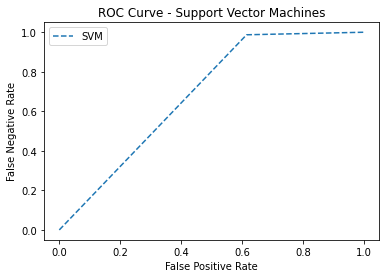

In [18]:
get_roc_curve(test_labels, predict, 'Support Vector Machines', 'SVM')

AUR for PR: 0.8614902937327323



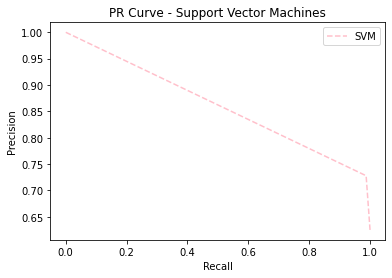

In [19]:
get_pr_curve(test_labels, predict, 'Support Vector Machines', 'SVM')

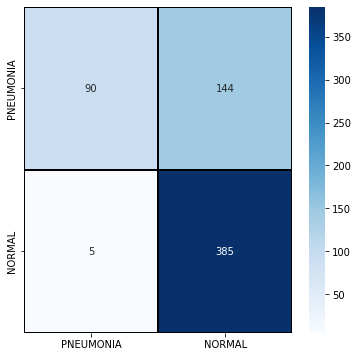

In [20]:
get_confusion_matrix(test_labels, predict)

# Get Dataset

In [6]:
def get_data(image_dimension):
  
  # for test data
  test_data = []
  test_labels = []

  # for train data
  train_data = []
  train_labels = []

  # normal test images
  for image in (os.listdir(input_path + 'test/NORMAL/')):
    image = plt.imread(input_path + 'test/NORMAL/' + image)
    image = cv2.resize(image, (image_dimension, image_dimension))
    image = image.astype('float32') / 255
    
    test_data.append(image)
    test_labels.append(0)

  # pneumonia test images
  for image in (os.listdir(input_path + 'test/PNEUMONIA/')):
    image = plt.imread(input_path + 'test/PNEUMONIA/' + image)
    image = cv2.resize(image, (image_dimension, image_dimension))
    image = image.astype('float32') / 255
    
    test_data.append(image)
    test_labels.append(1)

  # normal train images
  for image in (os.listdir(input_path + 'train/NORMAL/')):
    image = plt.imread(input_path + 'train/NORMAL/' + image)
    image = cv2.resize(image, (image_dimension, image_dimension))
    image = image.astype('float32') / 255
    
    train_data.append(image)
    train_labels.append(0)

  # pneumonia test images
  for image in (os.listdir(input_path + 'train/PNEUMONIA/')):
    image = plt.imread(input_path + 'train/PNEUMONIA/' + image)
    image = cv2.resize(image, (image_dimension, image_dimension))
    image = image.astype('float32') / 255
    
    train_data.append(image)
    train_labels.append(1)

  return test_data, test_labels, train_data, train_labels